In [1]:
import sys
sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
from IPython.display import display, update_display
from models.dalle.dalle import MinDalle

In [ ]:
torch.manual_seed(0)
model = MinDalle(root_dir='../pretrained', dtype=torch.float32, device='cuda')

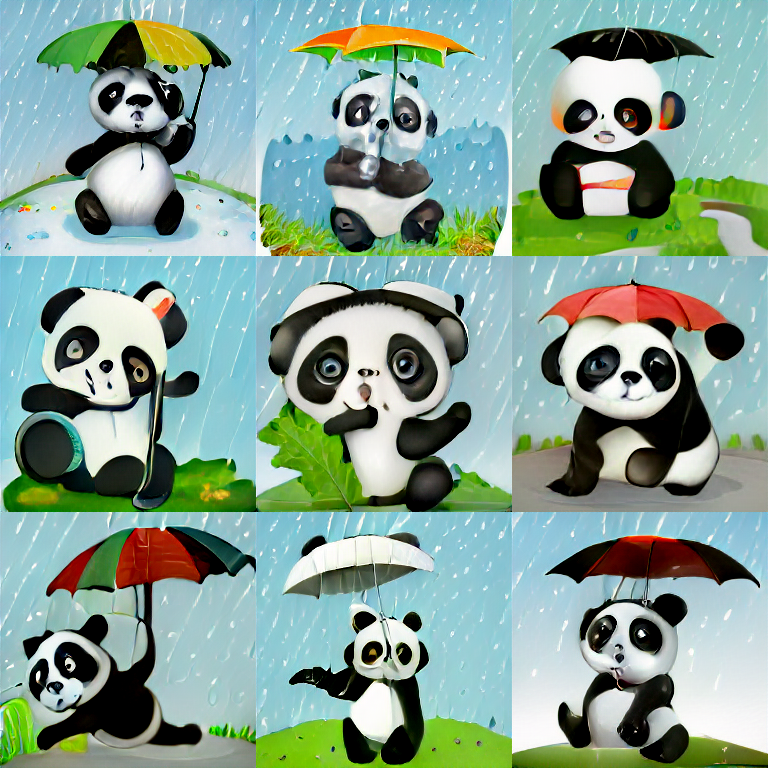

CPU times: user 15.8 s, sys: 396 ms, total: 16.2 s
Wall time: 16.4 s


In [8]:
%%time

text = "an illustration of a baby panda with headphones holding an umbrella in the rain"
# text = "A dragon fruit wearing karate belt in the snow"
progressive_outputs = True
seamless = False
grid_size = 3
temperature = 1
supercondition_factor = 16
top_k = 128

image_stream = model.generate_image_stream(
    text=text,
    grid_size=grid_size,
    progressive_outputs=progressive_outputs,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False